# Challenge 1 - Power Load Report

Start by importing the needed packages and read the data:

In [1]:
# import packages
import pandas as pd
import numpy as np
import statsmodels
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.style.use('bmh')

In [2]:
# read the data directly from the forked repo 
raw_url = 'https://raw.githubusercontent.com/leoiania/interviews-data-science-assignment/1b0d1c082053383f7f292f17e95f830cd259bbcc/datasets/italian-power-load/load.csv'

data = pd.read_csv(raw_url, parse_dates=['Date'], index_col='Date')
# with these 2 arguments, the column "Date" will be the index and is read in date format directly.

## 1. First look at the series

The series contains daily data about the power Load of Zap Inc, from 2006 to 2nd of February,2022, as we can observe by looking at the first 5 and the last 5 rows of the dataset:

In [3]:
data.head()

,Load
Date,
2006-01-01,666542.0
2006-01-02,855403.0
2006-01-03,914705.0
2006-01-04,926705.0
2006-01-05,927560.0


In [4]:
data.tail()

,Load
Date,
2022-02-03,890021.44000
2022-02-04,887676.33425
2022-02-05,735085.35950
2022-02-06,640737.83475
2022-02-07,845468.99850


In [5]:
data.describe()

,Load
count,5.882000e+03
mean,8.494072e+05
std,1.257623e+05
min,4.587518e+05
25%,7.575872e+05
50%,8.720725e+05
75%,9.424057e+05
max,1.188554e+06


Now some checks about data, to inspect:

* null data
* duplicates in the Date (i.e if there are different values for the same day it would be a problem)


In [6]:
data.isna().sum()

Load    0
dtype: int64

In [7]:
data.index.duplicated().sum()

0

In [8]:
data.shape

(5882, 1)

Everything seems ok: there are no null data, no duplicates in the days (of course we do not need to check the Load values: duplicates here are possible and they are not a problem). 

Moreover, the length of the dataset is 5882 which is coherent with the number of days we're dealing with (i.e the series is full-filled).

## 2. Graphical checks

To have a better idea of the data we're dealing with, we can use some plots. 

The first one is basically the series to see the behaviour of the Power Load over time:

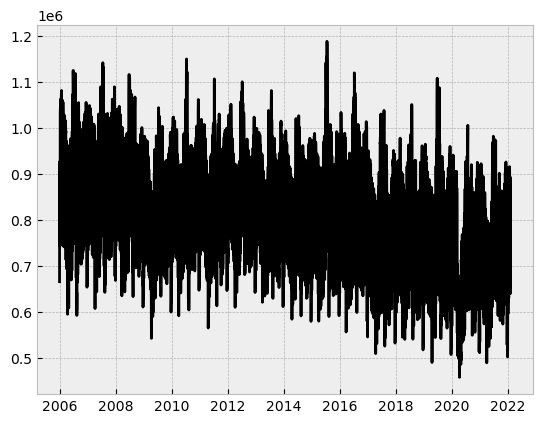

In [9]:
plt.plot(data, color = 'black')
plt.show()

This plot shows a sort of convergence to a "mean" of the series, but we need further investigation on different years - we will do it later.

Looking at the histogram, we can obtain an idea on how data are distributed:

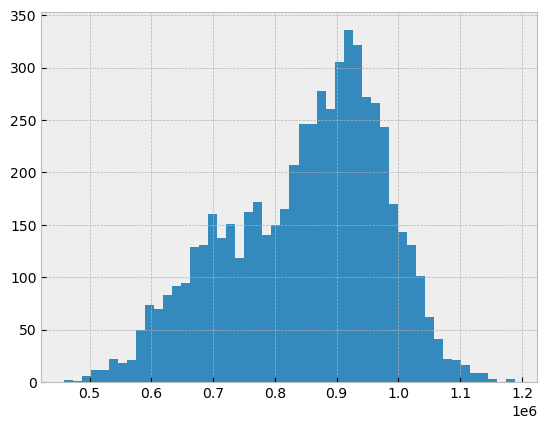

In [10]:
plt.hist(data,bins=50)
plt.show()

Due to the form of the histogram, there is a clear presence of skewness in the series but we can be happy considering they are real data so we can't expect a perfect symmetric form.

Then we check the boxplot, where we see again the skewness due to the position of the mean and only two points out of it.

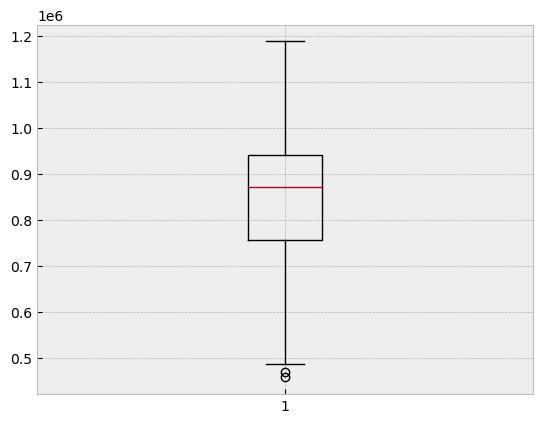

In [11]:
plt.boxplot(data)
plt.show()

As last check we look at the qq-plot, it compares observed quantile with the theoretical ones coming from a normal distribution. Points closer to the line indicate a normal distribution. Namely, if we compare two normal distributions the points will lie exactly on the line:

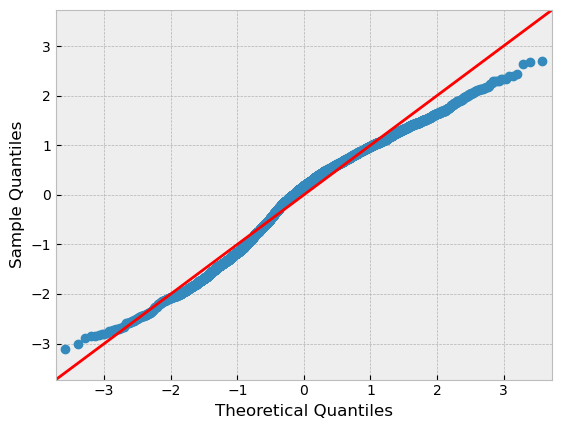

In [12]:
sm.qqplot(data['Load'], line="45", fit=True)   # the default comparing distribution is the normal, so we don't need to specify it
                                               # line="45" create the bisector line
                                               # fit=True will scale the plotted data
plt.show()

At the end of this part, we can state that we can be happy with the statistical features of this series considering how in real world data are far from the theoretical/academic ones, leaving us free to use different models/approaches.


## 3. The series more-in-depth

In interpreting the data, since we are talking about Power Load, we can expect to have cycling behaviours of the series. In the first plot maybe something cyclical is observed, but there are too many observations (5800+) making difficult for us to extrapolate informations.

To study the data in details, let's plot some different months and different years:

### 3.1 Monthly behaviour

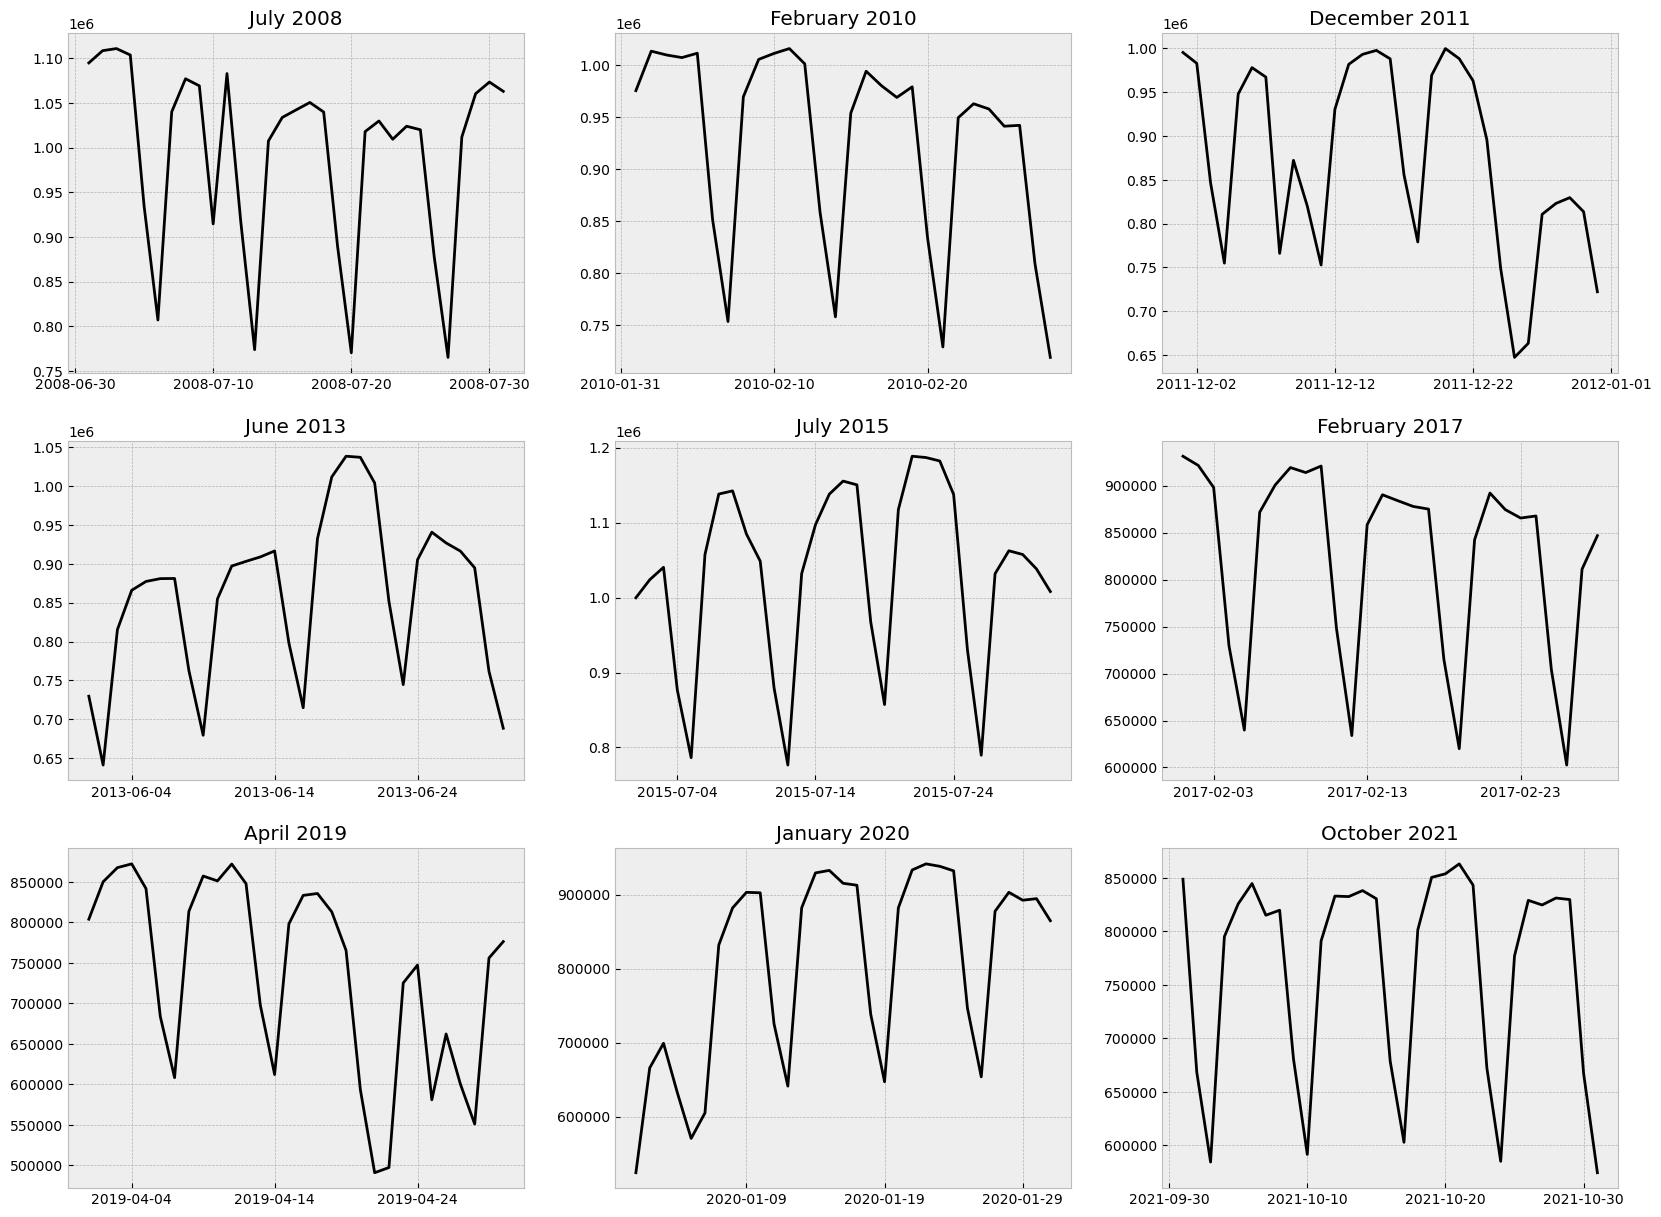

In [13]:
plt.figure(figsize=(20,15))

plt.subplot(3,3,1)
plt.plot(data.loc['2008-07'],color="black")
ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.title("July 2008")

plt.subplot(3,3,2)
plt.plot(data.loc['2010-02'],color="black")
ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.title("February 2010")

plt.subplot(3,3,3)
plt.plot(data.loc['2011-12'],color="black")
ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.title("December 2011")

plt.subplot(3,3,4)
plt.plot(data.loc['2013-06'],color="black")
ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.title("June 2013")

plt.subplot(3,3,5)
plt.plot(data.loc['2015-07'],color="black")
ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.title("July 2015")

plt.subplot(3,3,6)
plt.plot(data.loc['2017-02'],color="black")
ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.title("February 2017")

plt.subplot(3,3,7)
plt.plot(data.loc['2019-04'],color="black")
ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.title("April 2019")

plt.subplot(3,3,8)
plt.plot(data.loc['2020-01'],color="black")
ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.title("January 2020")

plt.subplot(3,3,9)
plt.plot(data.loc['2021-10'],color="black")
ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.title("October 2021")

plt.show()

From the grid above we can state, for first, that in summer months the power load is higher. But, more important, we have a clear weekly cycle!

Now look at the first week we have, starting on 1st January, 2006:

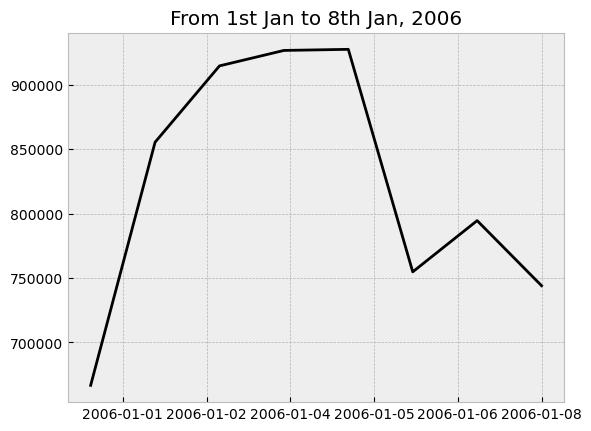

In [14]:
plt.plot(data.loc['2006-01-01':'2006-01-08'],color="black")
ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1.3))
plt.title("From 1st Jan to 8th Jan, 2006")
plt.show()

If we think about power load, we can of course imagine a weekly cycle. The plot above starts with a Sunday (2006-01-01) when the Load is low; it will increase in the week and then turn low again in the week-end.

### 3.2 Annual behaviour

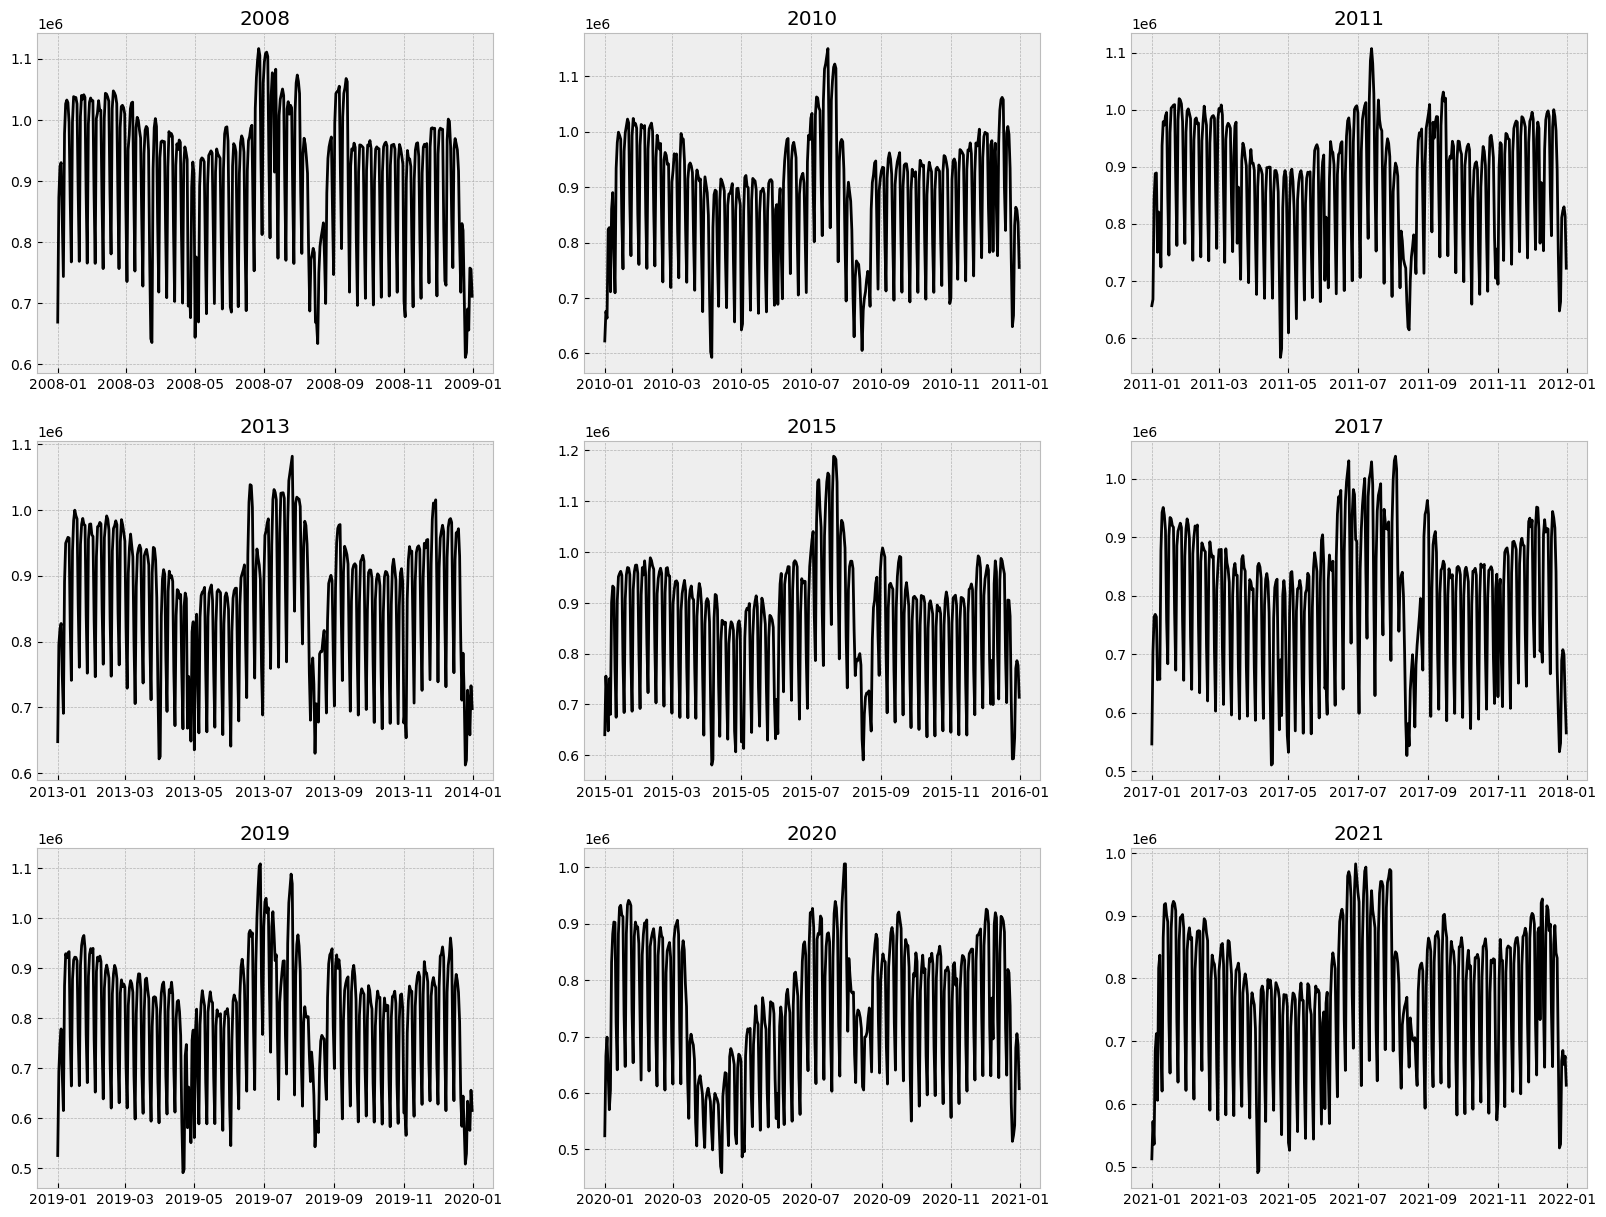

In [15]:
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
plt.plot(data.loc['2008'],color="black")
plt.title("2008")
plt.subplot(3,3,2)
plt.plot(data.loc['2010'],color="black")
plt.title("2010")
plt.subplot(3,3,3)
plt.plot(data.loc['2011'],color="black")
plt.title("2011")

plt.subplot(3,3,4)
plt.plot(data.loc['2013'],color="black")
plt.title("2013")
plt.subplot(3,3,5)
plt.plot(data.loc['2015'],color="black")
plt.title("2015")
plt.subplot(3,3,6)
plt.plot(data.loc['2017'],color="black")
plt.title("2017")

plt.subplot(3,3,7)
plt.plot(data.loc['2019'],color="black")
plt.title("2019")
plt.subplot(3,3,8)
plt.plot(data.loc['2020'],color="black")
plt.title("2020")
plt.subplot(3,3,9)
plt.plot(data.loc['2021'],color="black")
plt.title("2021")

plt.show()

The first thing that emerges is how annual power load is similar: the behaviours is almost the same in different years. There is a peak about each 6 month, and this information can be very useful in modeling.

The series, in each of the years, takes its highest value in the summer. This is quite intuitive: it is due to the fact that days are "longer" and maybe air conditioning can affect its value.

Another thing that emerges, as "suggested" by Marta, is in the data of 2020: from March to May (let us say during the spring) there is a irregular reduction of power load: in these months there was the Covid Lockdown, but we will analyze it better later.

## 4. Autocorrelation

To end the data features exploration, we can look in autocorrelation and partial autocorrelation.

Avoiding technicalities, it tells how much a value in a specific time is related to a value that is observed *k* times in the past. The value *k* starts from 1 and it represent the value observed immediately before up to, theoretically, the total length of the series.

We can analyze the autocorrelation using plots:

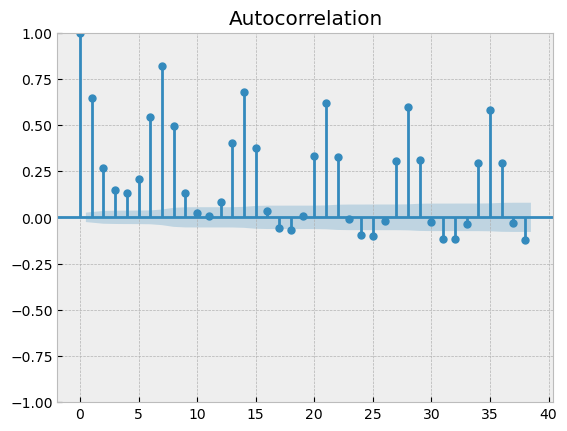

In [16]:
statsmodels.graphics.tsaplots.plot_acf(data['Load']);
plt.show();

c:\ProgramData\Anaconda3\envs\text_mining\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


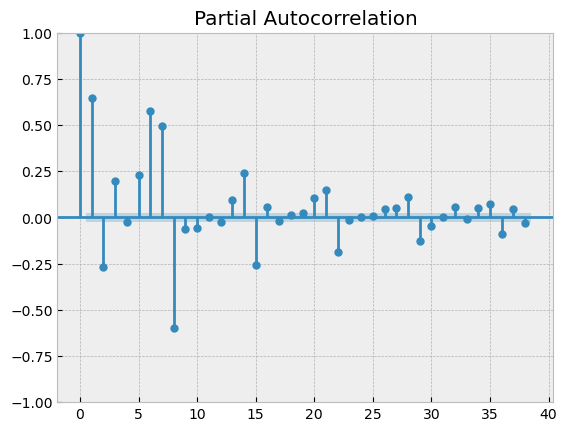

In [17]:
statsmodels.graphics.tsaplots.plot_pacf(data['Load']);
plt.show();

Of course, both plots show a weekly seasonality, that must be taken into account when modelling.